In [92]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing import image
import matplotlib.path as mplpath

from learning2learn.images import generate_image, generate_random_shape, Texture, generate_colors
from learning2learn.util import synthesize_data

In [33]:
# def generate_texture(patch_type=None, gradient='sample', image_size=500):
#     """

#     :param patch_type:
#     :param gradient:
#     :param image_size:
#     :return:
#     """
#     if patch_type is None:
#         # randomly sample a patch type
#         patch_types = [
#             'ellipse', 'arc', 'arrow', 'circle',
#             'rectangle', 'wedge', 'pentagon',
#             '/', '//', '-', '--', '+', '++'
#         ]
#         patch_type = np.random.choice(patch_types)
#     # Patch size will be uniformly sampled. Let's define
#     # reasonable boundaries here
#     patch_min_size = int(0.03*image_size)
#     patch_max_size = int(0.09*image_size)
#     # Now, build the texture object according to the specified type
#     if patch_type == 'circle':
#         params = {
#             'radius': randint(patch_min_size, patch_max_size)
#         }
#     elif patch_type in ['rectangle', 'ellipse', 'arc']:
#         params = {
#             'height': randint(patch_min_size, patch_max_size),
#             'width': randint(2*patch_min_size, 2*patch_max_size),
#             'angle': randint(0, 180)
#         }
#     elif patch_type == 'pentagon':
#         params = {
#             'radius': randint(patch_min_size, patch_max_size)
#         }
#     elif patch_type == 'wedge':
#         params = {
#             'radius': randint(patch_min_size, patch_max_size),
#             'theta2': randint(45, 270)
#         }
#     elif patch_type == 'arrow':
#         params = {
#             'dx': randint(-patch_max_size, patch_max_size),
#             'dy': randint(-patch_max_size, patch_max_size),
#             'width': randint(3*patch_min_size, 3*patch_max_size)
#         }
#     elif patch_type in ['/', '//', '-', '--', '+', '++']:
#         params = None
#     else:
#         raise Exception('Invalid patch_type parameter.')

#     if patch_type in ['ellipse', 'arc', 'arrow', 'circle','rectangle',
#                       'wedge', 'pentagon']:
#         # As another parameter, step size (space between
#         # patches) will be uniformly sampled. Define
#         # boundaries here
#         step_min_size = int(0.15*image_size)
#         step_max_size = int(0.30*image_size)
#         # Now sample the step size. Later, we will step
#         # through the image placing the patches at different
#         # locations, 'step' pixels apart from one another
#         step = randint(step_min_size, step_max_size)
#     else:
#         step = None

#     if gradient == 'sample':
#         # As a final parameter, we will sample a gradient from
#         # a set of 5 options
#         gradient_options = [None, 'left', 'right', 'up', 'down']
#         gradient = np.random.choice(gradient_options)
#     else:
#         # In this case, the gradient has already been provided.
#         # Let's error-check it.
#         assert gradient in [None, 'left', 'right', 'up', 'down']

#     # Now create the texture object instance and return
#     return Texture(patch_type, gradient, step, params)

# def generate_textures(nb_categories, image_size):
#     step_min = int(0.15*image_size)
#     step_max = int(0.30*image_size)
#     size_min = int(0.03*image_size)
#     size_max = int(0.09*image_size)
#     textures = []
#     # hatches
#     for hatch_type in ['/', '//', '-', '--', '+', '++']:
#         textures.append(Texture(hatch_type, gradient=None))
#     # circles and pentagons
#     for size in [6, 10, 14]:
#         params = {'radius': size}
#         for step in [45, 60]:
#             textures.append(Texture('circle', None, step, params))
#             textures.append(Texture('pentagon', None, step, params))
#     # rectangles, ellipses and arcs
#     for size in [6, 10, 14]:
#         for angle in [0, 45, 90]:
#             params = {
#                 'height': 1.5*size,
#                 'width': size,
#                 'angle': angle
#             }
#             for step in [45, 60]:
#                 textures.append(Texture('rectangle', None, step, params))
#                 textures.append(Texture('ellipse', None, step, params))
#                 textures.append(Texture('arc', None, step, params))
#     # wedges
#     for size in [6, 10, 14]:
#         for theta in [180, 270]:
#             params = {
#                 'radius': size,
#                 'theta2': theta
#             }
#             for step in [45, 60]:
#                 textures.append(Texture('wedge', None, step, params))
#     # arrows
#     for size in [6, 10, 14]:
#         for width in [20, 50]:
#             params = {
#                 'dx': size,
#                 'dy': size,
#                 'width': width
#             }
#             for step in [45, 60]:
#                 textures.append(Texture('arrow', None, step, params))
    
#     return textures

# def generate_dataset_parameters(nb_categories, image_size=500):
#     # Generate shapes, which are sets of points for which polygons will
#     # be generated
#     shapes = [generate_random_shape(0, 500, 0, 500, 100) for _ in
#               range(nb_categories)]
#     # Generate colors, which are 3-D vectors of values between 0-1 (RGB values)
#     colors = generate_colors(nb_categories)

#     return shapes, colors

## First, we will make textures with circles

In [47]:
# patch_type = 'circle'
# i = 0

In [74]:
# params = {
#     'radius': 10
# }
# texture = Texture(patch_type, None, 30, params)
# generate_image(shape, color, texture, os.path.join(save_folder, '%s%i.png' % (patch_type, i)))
# i += 1

# Let's play around with image textures...

In [106]:
def get_textures(nb_textures):
    assert os.path.isdir('../data/textures')
    files = sorted([file for file in os.listdir('../data/textures') if file.endswith('tiff')])
    assert nb_textures <= len(files)
    
    #return np.random.choice(files, nb_textures, replace=False)
    return files[:nb_textures]
    
def generate_dataset_parameters(nb_categories, image_size=500):
    # Generate shapes, which are sets of points for which polygons will
    # be generated
    shapes = [generate_random_shape(0, 500, 0, 500, 100) for _ in
              range(nb_categories)]
    # Generate colors, which are 3-D vectors of values between 0-1 (RGB values)
    colors = generate_colors(nb_categories)
    # Generate textures, which come from saved image files
    textures = get_textures(nb_categories)

    return shapes, colors, textures

def generate_image(shape, color, texture, save_file):
    """

    :param shape:
    :param color:
    :param texture:
    :param save_file:
    :return:
    """
    # Generate the base image and save it to a file
    img = image.load_img('../data/textures/%s' % texture, target_size=(300,300))
    img = image.img_to_array(img) / 255.
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5, 5)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img*color, interpolation='bicubic')
    plt.savefig(save_file)
    plt.close()
    # Load the base image from file, crop it using mplpath,
    # and save back to the file
    img = image.load_img(save_file, target_size=(500, 500))
    img = image.img_to_array(img)
    img /= 255.
    p = mplpath.Path(shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if not p.contains_point((i, j)):
                img[j,i,:] = np.array([1.,1.,1.])
    fig = plt.figure(frameon=False)
    fig.set_size_inches(5, 5)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img)
    plt.savefig(save_file, bbox_inches='tight')
    plt.close()

In [113]:
data_folder = '../data/images_generated/'
nb_categories = 50
nb_exemplars = 20

# Get shapes, colors and textures
shape_set, color_set, texture_set = generate_dataset_parameters(nb_categories)

# Synthesize dataset
df, _ = synthesize_data(nb_categories, nb_exemplars+1)
shapes = [shape_set[i] for i in df['shape']]
colors = [color_set[i] for i in df['color']]
textures = [texture_set[i] for i in df['texture']]

In [114]:
for shape, color, texture, i in zip(shapes, colors, textures, range(len(shapes))):
    shape_ind = df['shape'].loc[i]
    save_file = os.path.join(
        data_folder,
        'shape%0.2i_color%0.2i_texture%0.2i.png' % (df['shape'].loc[i], df['color'].loc[i], df['texture'].loc[i])
    )
    generate_image(shape, color, texture, save_file)
# Save the dataset parameters so we know what we're working with
df.to_csv(os.path.join(data_folder, 'data.csv'))

In [94]:
#generate_image(shapes[0], colors[0], textures[0], '/Users/reubenfeinman/Desktop/temp/TEMP.png')

In [ ]:
def create_dataset(nb_categories, nb_exemplars, data_folder):
    # Generate the set of shapes, colors and textures that we will draw from
    shape_set, color_set, texture_set = \
        generate_dataset_parameters(nb_categories)
    # Create folder where images will be stored; if exists, remove
    if os.path.isdir(data_folder):
        print('A dataset of the specified parameters already exists. Using '
              'the existing one...')
    else:
        print('Building the image dataset...')
        os.mkdir(data_folder)
        # Synthesize the dataset. Use nb_exemplars+1 because 1 exemplar
        # of each class will be used for testing.
        df, _ = synthesize_data(nb_categories, nb_exemplars+1)
        shapes = [shape_set[i] for i in df['shape']]
        colors = [color_set[i] for i in df['color']]
        textures = [texture_set[i] for i in df['texture']]
        for shape, color, texture, i in \
                zip(shapes, colors, textures, range(len(shapes))):
            save_file = os.path.join(data_folder, 'img%0.4i.png' % i)
            generate_image(shape, color, texture, save_file)
        # Save the dataset parameters so we know what we're working with
        df.to_csv(os.path.join(data_folder, 'data.csv'))

In [5]:
textures = generate_textures(nb_categories=10, image_size=500)

In [7]:
len(textures)

96

In [16]:
for i in range(20):
    print(i)
    save_file = '/Users/reubenfeinman/Desktop/temp/img%0.2i.png' % i
    generate_image(shape, color, textures[i], save_file)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [9]:
def load_image_dataset(data_folder, target_size=(200, 200), feature_info=True):
    # First load the images
    imgs = []
    files = [file for file in os.listdir(data_folder) if file.endswith('png')]
    files = sorted(files)
    for file in files:
        img_path = os.path.join(data_folder, file)
        img = image.load_img(img_path, target_size=target_size,
                             interpolation='bicubic')
        imgs.append(image.img_to_array(img))
    imgs = np.asarray(imgs)
    imgs /= 255.
    if feature_info:
        # Now load the feature info
        feature_file = os.path.join(data_folder, 'data.csv')
        df = pd.read_csv(feature_file, index_col=0)
        #shapes = df['shape'].as_matrix()

        # Return both images and shape info
        return imgs, df
    else:
        return imgs

def load_image_dataset1(nb_categories, nb_exemplars, data_folder,
                        target_size=(200, 200)):
    # First load the images
    imgs = []
    files = [file for file in os.listdir(data_folder) if file.endswith('png')]
    files = sorted(files)
    for file in files:
        img_path = os.path.join(data_folder, file)
        img = image.load_img(img_path, target_size=target_size,
                             interpolation='bicubic')
        imgs.append(image.img_to_array(img))
    imgs = np.asarray(imgs)
    imgs /= 255.
    # Now load the feature info
    feature_file = os.path.join(data_folder, 'data.csv')
    df = pd.read_csv(feature_file, index_col=0)
    # Collect a subset of the data according to nb_categories, nb_exemplars
    ix = []
    for cat in range(nb_categories):
        ix_cat = df[df['shape'] == cat].index.tolist()
        ix_cat = ix_cat[:nb_exemplars]
        ix.extend(ix_cat)
    imgs = imgs[ix]
    df = df.iloc[ix]

    return imgs, df['shape'].as_matrix()

In [10]:
#data_folder = '/Users/reubenfeinman/Dropbox/NYU/brenden_lake/learning-to-learn/data/images_ca0050_ex0014'
data_folder = '/Users/reubenfeinman/Desktop/temp'
#X, df = load_image_dataset1(10, 5, data_folder, target_size=(200, 200))
X = load_image_dataset(data_folder, target_size=(200, 200), feature_info=False)

In [11]:
%matplotlib inline
import matplotlib.pylab as plt

In [12]:
def show_img(o, img):
    o.imshow(img)
    o.axis('off')

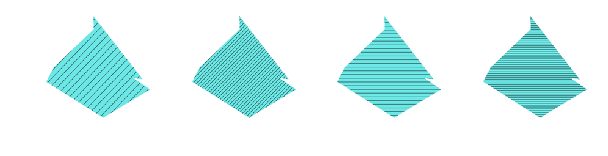

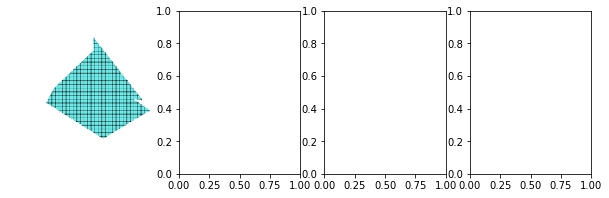

In [15]:
nrows = int(np.ceil(len(X)/4))
# plot in rows of 4
for i in range(nrows):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
    for j in range(4):
        if i*4+j < len(X):
            axes[j].imshow(X[i*4+j])
            axes[j].axis('off')
    plt.show()